# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-10-23**  
**Exercise Sheet Submission Deadline: 2023-11-03, noon (i.e. 12:00), via git or e-mail to aderiyeva@techfak.uni-bielefeld.de**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

Von: Vincent Keuch

## Preamble: Data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Data = np.loadtxt('sheet01_data.csv', skiprows = 1, delimiter = '\t')
print(Data)

[[  0.   0.  27.  40.]
 [  1.   0.  31.  34.]
 [  2.   0.  30.  nan]
 [  3.   0.  20.  nan]
 [  4.   0.  41.  54.]
 [  5.   0.  39.  51.]
 [  6.   0.  20.  33.]
 [  7.   0.  27.  36.]
 [  8.   0.  79.  83.]
 [  9.   0.  33.  46.]
 [ 10.   0.  22.  29.]
 [ 11.   0.  22.  41.]
 [ 12.   0.  29.  nan]
 [ 13.   0.  25.  nan]
 [ 14.   0.  41.  47.]
 [ 15.   0.  23.  36.]
 [ 16.   0.  17.  30.]
 [ 17.   0.  93. 100.]
 [ 18.   0.  34.  40.]
 [ 19.   0.  23.  27.]
 [ 20.   0.  48.  53.]
 [ 21.   0.  19.  26.]
 [ 22.   0.  28.  33.]
 [ 23.   0.  38.  46.]
 [ 24.   0.  22.  34.]
 [ 25.   0.  34.  45.]
 [ 26.   0.  36.  49.]
 [ 27.   0.  33.  47.]
 [ 28.   0.  40.  41.]
 [ 29.   0.  39.  52.]
 [ 30.   1.  24.  50.]
 [ 31.   1.  38.  62.]
 [ 32.   1.  34.  51.]
 [ 33.   1.  37.  nan]
 [ 34.   1.  31.  44.]
 [ 35.   1.  37.  57.]
 [ 36.   1.  25.  50.]
 [ 37.   1.  23.  37.]
 [ 38.   1.  12.  38.]
 [ 39.   1.  31.  56.]
 [ 40.   1.  36.  46.]
 [ 41.   1.  34.  48.]
 [ 42.   1.  85. 100.]
 [ 43.   1.

### Task 01.01

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [110]:
numberDataPre = 0
meanPreScore = 0.
stdDevPreScore = 0.


#Calculate mean for the pre-test scores
for student in Data:
    if not np.isnan(student[2]):
        numberDataPre += 1
        meanPreScore += student[2]
meanPreScore = meanPreScore / numberDataPre


#Calculate standard deviation for the pre-test scores
for student in Data:
    if not np.isnan(student[2]):
        stdDevPreScore += (student[2] - meanPreScore) ** 2
stdDevPreScore = np.sqrt(stdDevPreScore / numberDataPre)


#Remove outliers
toRemove = []
rowToRemove = 0
for student in Data:
    if not np.isnan(student[2]):
        if 3. < abs((student[2] - meanPreScore) / stdDevPreScore):
            toRemove.append(rowToRemove)
    rowToRemove += 1

Data = np.delete(Data, toRemove, axis=0)

Print how many points are left in the control group and the intervention group after outlier removal

In [111]:
numberIntervention = 0
numberControl = 0

for student in Data:
    if student[1] == 1:
        numberIntervention += 1
    else:
        numberControl += 1

print(f"Intervention group: {numberIntervention} points")
print(f"Control group: {numberControl} points")

Intervention group: 29 points
Control group: 28 points


### Task 01.02

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the control group and the intervention group. Be aware of nan values. Print the results.

In [112]:
numberPreInter = 0
numberPreCont = 0
numberPostInter = 0
numberPostCont = 0

meanPreInter = 0.
meanPreCont = 0.
meanPostInter = 0.
meanPostCont = 0.

stdDevPreInter = 0.
stdDevPreCont = 0.
stdDevPostInter = 0.
stdDevPostCont = 0.


#Calculate the respective means
for student in Data:
    if student[1] == 1:
        if not np.isnan(student[2]):
            numberPreInter += 1
            meanPreInter += student[2]
        if not np.isnan(student[3]):
            numberPostInter += 1
            meanPostInter += student[3]
    else:
        if not np.isnan(student[2]):
            numberPreCont += 1
            meanPreCont += student[2]
        if not np.isnan(student[3]):
            numberPostCont += 1
            meanPostCont += student[3]

meanPreInter = meanPreInter / numberPreInter
meanPostInter = meanPostInter / numberPostInter
meanPreCont = meanPreCont / numberPreCont
meanPostCont = meanPostCont / numberPostCont


#Calculate the respective standard deviation
for student in Data:
    if student[1] == 1:
        if not np.isnan(student[2]):
            stdDevPreInter += (student[2] - meanPreInter) ** 2
        if not np.isnan(student[3]):
            stdDevPostInter += (student[3] - meanPostInter) ** 2
    else:
        if not np.isnan(student[2]):
            stdDevPreCont += (student[2] - meanPreCont) ** 2
        if not np.isnan(student[3]):
            stdDevPostCont += (student[3] - meanPostCont) ** 2

stdDevPreInter = np.sqrt(stdDevPreInter / numberPreInter)
stdDevPostInter = np.sqrt(stdDevPostInter / numberPostInter)
stdDevPreCont = np.sqrt(stdDevPreCont / numberPreCont)
stdDevPostCont = np.sqrt(stdDevPostCont / numberPostCont)


print(f"Pre-Test Intervention group: mean {meanPreInter} standard deviation {stdDevPreInter}")
print(f"Post-Test Intervention group: mean {meanPostInter} standard deviation {stdDevPostInter}")
print(f"Pre-Test Control group: mean {meanPreCont} standard deviation {stdDevPreCont}")
print(f"Post-Test Control group: mean {meanPostCont} standard deviation {stdDevPostCont}")

Pre-Test Intervention group: mean 30.20689655172414 standard deviation 9.147750092122058
Post-Test Intervention group: mean 50.11538461538461 standard deviation 9.069504791319277
Pre-Test Control group: mean 30.035714285714285 standard deviation 8.033332980495095
Post-Test Control group: mean 40.416666666666664 standard deviation 8.396014266040497


### Task 01.03

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.

In [113]:
for student in Data:
    if student[1] == 1:
        if np.isnan(student[2]):
            student[2] = meanPreInter
        if np.isnan(student[3]):
            student[3] = meanPostInter
    else:
        if np.isnan(student[2]):
            student[2] = meanPreCont
        if np.isnan(student[3]):
            student[3] = meanPostCont

## Data Visualization

### Task 01.04

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

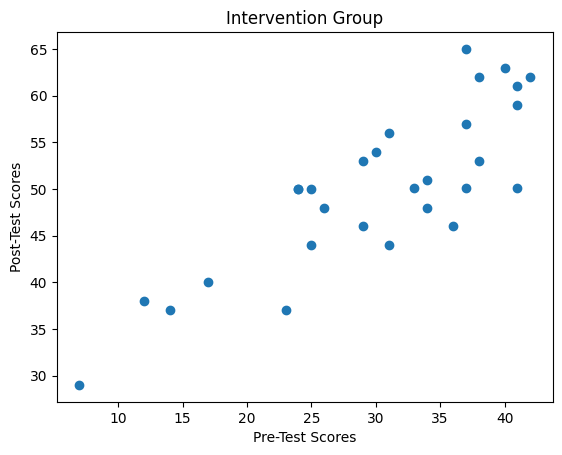

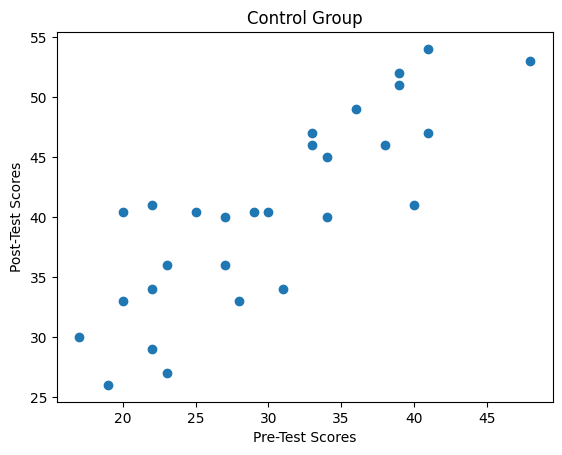

'\nYes, there is an obvious correlation between the pre- and post-test scores, as one can clearly see that the post-test scores were higher for the students who had higher pre-test scores.\n'

In [114]:
scoresPreInter = []
scoresPostInter = []
scoresPreCont = []
scoresPostCont = []

for student in Data:
    if student[1] == 1:
        scoresPreInter.append(student[2])
        scoresPostInter.append(student[3])
    else:
        scoresPreCont.append(student[2])
        scoresPostCont.append(student[3])
        

plt.figure(1)
plt.scatter(scoresPreInter, scoresPostInter, label='Intervention Group')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Post-Test Scores')
plt.title('Intervention Group')

plt.figure(2)
plt.scatter(scoresPreCont, scoresPostCont, label='Control Group')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Post-Test Scores')
plt.title('Control Group')

plt.show()

'''
Yes, there is an obvious correlation between the pre- and post-test scores, as one can clearly see that the post-test scores were higher for the students who had higher pre-test scores.
'''

Yes, I believe that pre- and post-test scores correlate because post-test scores tend to be higher when pre-test scores are higher and vice versa.

### Task 01.05

Display a bar plot with four bars (with error bars): pre-test mean (and standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

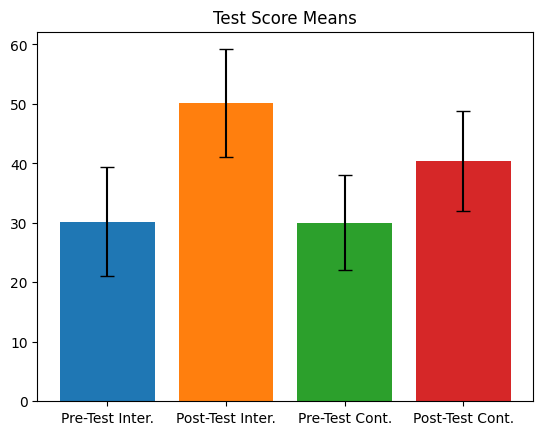

'\nA significant difference is between the post scores of both groups. There one can clearly see an increase for the Intervention group. This might be cause by the method used on the student.\n'

In [115]:
plt.figure(3)
plt.bar('Pre-Test Inter.', meanPreInter, yerr=stdDevPreInter, capsize=5)
plt.bar('Post-Test Inter.', meanPostInter, yerr=stdDevPostInter, capsize=5)
plt.bar('Pre-Test Cont.', meanPreCont, yerr=stdDevPreCont, capsize=5)
plt.bar('Post-Test Cont.', meanPostCont, yerr=stdDevPostCont, capsize=5)
plt.title('Test Score Means')
plt.show()

'''
A significant difference is between the post scores of both groups. There one can clearly see an increase for the Intervention group. This might be cause by the method used on the student.
'''

I think control pre and intervention pre do not differ.
control post is higher than both control pre and intervention pre because the students learned something between pre- and post-test.
intervention post is even higher than control post because students learned more in the intervention than in the control condition.



### Task 01.06

Display a bar plot with two bars (with error bars): the difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

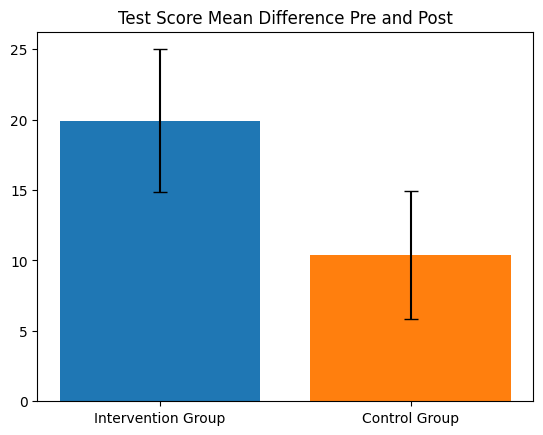

'\nYes, I do think there is a significant difference between those two, since they are both outside each other standard deviation.\n'

In [116]:
diffInter = []
diffCont = []

meanDiffInter = meanPostInter - meanPreInter
meanDiffCont = meanPostCont - meanPreCont
stdDevDiffInter = 0.
stdDevDiffCont = 0.


#Calculating standard deviations of the mean of the differences
for i in range(0, numberIntervention):
    diffInter.append(scoresPostInter[i] - scoresPreInter[i])
    stdDevDiffInter += (scoresPostInter[i] - scoresPreInter[i] - meanDiffInter) ** 2
    
stdDevDiffInter = np.sqrt(stdDevDiffInter / numberIntervention)

for i in range(0, numberControl):
    diffCont.append(scoresPostCont[i] - scoresPreCont[i])
    stdDevDiffCont += (scoresPostCont[i] - scoresPreCont[i] - meanDiffCont) ** 2

stdDevDiffCont = np.sqrt(stdDevDiffCont / numberControl)


plt.figure(3)
plt.bar('Intervention Group', meanDiffInter, yerr=stdDevDiffInter, capsize=5)
plt.bar('Control Group',meanDiffCont, yerr=stdDevDiffCont, capsize=5)
plt.title('Test Score Mean Difference Pre and Post')
plt.show()

'''
Yes, I do think there is a significant difference between those two, since they are both outside each other standard deviation.
'''

Yes, I think the score difference is significantly higher in the intervention group.

### Task 01.07 (Bonus task)

Display a box plot with four boxes: pre-test results in the control and intervention group, and post-test results in the control and intervention group. Label the axes.

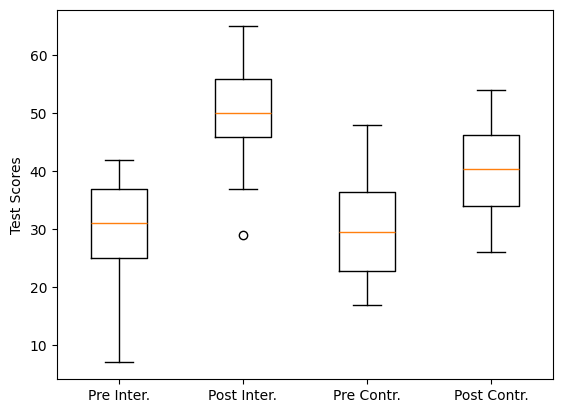

In [117]:
box_data = [scoresPreInter, scoresPostInter, scoresPreCont, scoresPostCont]
plt.figure(4)
plt.boxplot(box_data)
plt.ylabel('Test Scores')
plt.xticks([1, 2, 3, 4], ['Pre Inter.', 'Post Inter.', 'Pre Contr.', 'Post Contr.'])

plt.show()

### Task 01.08 (Bonus Task)

Display a box plot with two boxes: difference between post-test and pre-test scores for the control group and the intervention group.

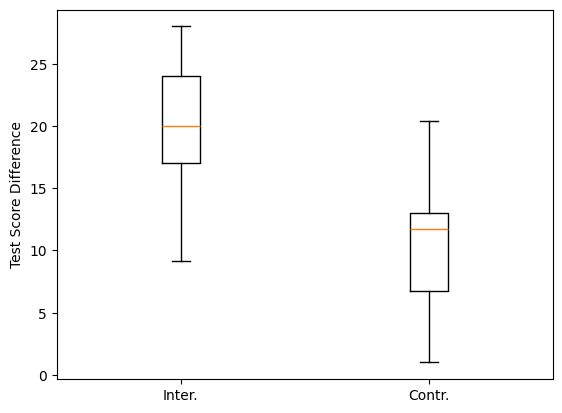

In [118]:
box_data_diff = [diffInter, diffCont]
plt.figure(5)
plt.boxplot(box_data_diff)
plt.ylabel('Test Score Difference')
plt.xticks([1, 2], ['Inter.', 'Contr.'])

plt.show()

## Statistical Testing

### Task 01.09

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [119]:
def custom_pearson_correlation(data_x, data_y):
    if not len(data_x) == len(data_y):
        return 0
    
    correlation = 0.
    mean_x = 0.
    mean_y = 0.
    std_dev_x = 0.
    std_dev_y = 0.
    length = len(data_x)
    
    for m in range(0, length):
        mean_x += data_x[m]
        mean_y += data_y[m]
        
    mean_x = mean_x / length
    mean_y = mean_y / length
    
    for j in range(0, length):
        std_dev_x += np.square(data_x[j] - mean_x)
        std_dev_y += np.square(data_y[j] - mean_y)
    
    std_dev_x = np.sqrt(std_dev_x / length)
    std_dev_y = np.sqrt(std_dev_y / length)
    
    for k in range(0, length):
        correlation += ((data_x[k] - mean_x) / std_dev_x) * ((data_y[k] - mean_y) / std_dev_y)
    
    return correlation / length

### Task 01.10

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

In [120]:
custom_pearson_corr_inter = custom_pearson_correlation(scoresPreInter, scoresPostInter)
custom_pearson_corr_contr = custom_pearson_correlation(scoresPreCont, scoresPostCont)

print(f'The Pearson correlation between the pre-and post-test scores in the intervention group is {custom_pearson_corr_inter}')
print(f'The Pearson correlation between the pre-and post-test scores in the control group is {custom_pearson_corr_contr}')

'''
In both cases can the correlation be consider as high.
'''

The Pearson correlation between the pre-and post-test scores in the intervention group is 0.837840086591938
The Pearson correlation between the pre-and post-test scores in the control group is 0.8332611589015754


'\nIn both cases can the correlation be consider as high.\n'

Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

In [121]:
inter_corr, inter_p_value = scipy.stats.pearsonr(scoresPreInter, scoresPostInter)
contr_corr, contr_p_value = scipy.stats.pearsonr(scoresPreCont, scoresPostCont)
print(inter_corr)
print(inter_p_value)
print(contr_corr)
print(contr_p_value)

'''
Yes. both correlations are statistically significant since both their p-values are way below 0.01.
'''

0.837840086591938
1.4299228500380579e-08
0.8332611589015756
3.726448859366983e-08


'\nYes. both correlations are statistically significant since both their p-values are way below 0.01.\n'

### Task 01.11

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as 
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

In [122]:
def custom_welch(data_x, data_y):
    size_x = 0.
    size_y = 0.
    mean_x = 0.
    mean_y = 0.
    std_dev_x = 0.
    std_dev_y = 0.
    
    
    #Calculate respective means
    for x in data_x:
        size_x += 1.
        mean_x += x
    
    mean_x = mean_x / size_x
    
    for y in data_y:
        size_y += 1
        mean_y += y
    
    mean_y = mean_y / size_y
    
    
    #Calculate standard deviation
    for x in data_x:
        std_dev_x += np.square(x - mean_x)
    
    std_dev_x = np.sqrt(std_dev_x / size_x)
    
    for y in data_y:
        std_dev_y += np.square(y - mean_y)
    
    std_dev_y = np.sqrt(std_dev_y / size_y)
    
    
    #Calculate values
    sigma = np.sqrt(np.square(std_dev_x) / size_x + np.square(std_dev_y) / size_y)
    t_value = - abs((mean_x - mean_y) / sigma)
    df = sigma ** 4 / (std_dev_x ** 4 / (size_x ** 2 * (size_x - 1)) + (std_dev_y ** 4 / (size_y ** 2 * (size_y - 1))))
    p_value = 2 * scipy.stats.t.cdf(t_value, df)
    
    return t_value, p_value

### Task 01.12

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

In [123]:
welch_t_pre, welch_p_pre = custom_welch(scoresPreCont, scoresPreInter)
welch_t_post, welch_p_post = custom_welch(scoresPostCont, scoresPostInter)
welch_t_diff, welch_p_diff = custom_welch(diffCont, diffInter)

print(f'The t-value for the pre-test is {welch_t_pre} and the p-value is {welch_p_pre}')
print(f'The t-value for the post-test is {welch_t_post} and the p-value is {welch_p_post}')
print(f'The t-value for the differences is {welch_t_diff} and the p-value is {welch_p_diff}')

'''
The post-test results are significant at a 0.01-level.
'''

The t-value for the pre-test is -0.07513803617898798 and the p-value is 0.9403799093554617
The t-value for the post-test is -4.473237788533329 and the p-value is 3.929589504745583e-05
The t-value for the differences is -7.450013256358262 and the p-value is 7.096056118224658e-10


'\nThe post-test results are significant at a 0.01-level.\n'

### Task 01.13

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.

In [124]:
d = abs(meanDiffInter - meanDiffCont) / np.sqrt((stdDevDiffInter ** 2 + stdDevDiffCont ** 2) / 2)
print(f'The effectsize is {d}, meaning the intervention had a large effect on the results')

The effectsize is 1.9720423435973942, meaning the intervention had a large effect on the results


### Task 01.14 (Bonus Task)

Write python code that uses the wilcoxon sign rank test (via `scipy.stats.wilcoxon`) to check whether the post-test scores in the control condition are significantly different from the pre-test scores. Repeat the same analysis for the intervention condition.

In [125]:
w_stat_inter, p_value_wilc_inter = scipy.stats.wilcoxon(scoresPreInter, scoresPostInter)
w_stat_contr, p_value_wilc_contr = scipy.stats.wilcoxon(scoresPreCont, scoresPostCont)

print(f'The w-stat for the intervention Group is {w_stat_inter} with a p-value of {p_value_wilc_inter}')
print(f'The w-stat for the control Group is {w_stat_contr} with a p-value of {p_value_wilc_contr}')

The w-stat for the intervention Group is 0.0 with a p-value of 3.725290298461914e-09
The w-stat for the control Group is 0.0 with a p-value of 7.450580596923828e-09


## Probabilistic Modeling

Let's assume that a student does a test in which they can achieve a certain number of points in the real numbers. Further, assume that the number of points achieved is generated from a Gaussian distribution with standard deviation $\sigma$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.15

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

**ANSWER**
*1.*
$Z = \{0,1\}$ where 0 indicates that the student didn't understand the topic and 1 that they did.
The probability function $p_Z$ tells us how likely it is for any given student to have understood the topic or not without further any information on the student.
$p_Z(0) = p_0$ $p_Z(1) = p_1$
*2.*
Since the points are Gaussian distributed we get $X = \mathbb{R}$. 
$p_{X|Z}$ is the probability of any given student to score a certain number of points given they either understood the topic or not.
Since the points are Gaussian distributed wa also get the probability of any $x \in X$ simply by calculating the formula for a Gaussian at point $x$ with the mean depending on whether the student has understood the topic or not.
\begin{math}
p_{X|Z}(x \in X|0) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_0)^2}{2\sigma^2}\right)\\
p_{X|Z}(x \in X|1) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_1)^2}{2\sigma^2}\right)
\end{math}  
Where $\mu_0$ is the mean for students who have not understood the topic and $\mu_1$ for those who did.                          

### Task 01.16

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

**ANSWER**
\begin{align}
p_{Z|X}(1|x) &= p_{X|Z}(x|1) * p_Z(1) / p_X(x)\\
&=  p_{X|Z}(x|1) * p_Z(1) / (p_{X|Z}(x|0) * p_Z(0) + p_{X|Z}(x|1) * p_Z(1))
\end{align}
Now we just need to put in the equations for $p_{X|Z}(x|0)$ and $p_{X|Z}(x|1)$ we have determined in the previous step and calculate for any given $x$.

### Task 01.17

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

**ANSWER**
*1.*
\begin{align*}
-\ln(x_i) &= -\ln\left( \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right) \right)\\
&= -\ln\left( \frac{1}{\sqrt{2\pi}\sigma}\right) - \ln\left(\exp\left(-\frac{(x_i -\mu)^2}{2\sigma^2}\right)\right)\\
&= -\ln(1) + \ln(\sqrt{2\pi}\sigma) + \frac{(x_i - \mu)^2}{2\sigma^2}\\
&= \ln(\sqrt{2\pi}\sigma) + \frac{(x_i - \mu)^2}{2\sigma^2}\\
-\sum_{i=1}^m \ln(x_i) &= \sum_{i=1}^m \left(\ln(\sqrt{2\pi}\sigma) + \frac{(x_i - \mu)^2}{2\sigma^2}\right)\\
&= m \cdot \ln(\sqrt{2\pi}\sigma) + \frac{1}{\sigma^2}\sum_{i=1}^m \frac{(x_i - \mu)^2}{2}\\
\end{align*}
To optimize in relation tu $\mu$ one must derivative in relation to $\mu$ and then equal that to zero. 
We don't need to check the second derivative since we can assume $\ln()$ to be convex.
\begin{gather*}
\frac{\mathrm{d}}{\mathrm{d}\mu}\left(-\sum_{i=1}^m \ln(x_i)\right) = 0\\
\Leftrightarrow \frac{\mathrm{d}}{\mathrm{d}\mu} \left(m \cdot \ln(\sqrt{2\pi}\sigma) + \frac{1}{\sigma^2}\sum_{i=1}^m \frac{(x_i - \mu)^2}{2}\right) = 0\\
\Leftrightarrow\frac{1}{\sigma^2}\sum_{i=1}^m \mu - x_i = 0\\
\Leftrightarrow m\mu = \sum_{i=1}^m x_i\\
\Leftrightarrow\mu = \frac{1}{m}\sum_{i=1}^m x_i
\end{gather*}
Same for $\sigma$
\begin{gather*}
\frac{\mathrm{d}}{\mathrm{d}\sigma}\left(-\sum_{i=1}^m \ln(x_i)\right) = 0\\
\Leftrightarrow \frac{\mathrm{d}}{\mathrm{d}\sigma}\left( m \cdot (\ln(\sqrt{2\pi}) + \ln(\sigma)) + \frac{1}{\sigma^2}\sum_{i=1}^m \frac{(x_i - \mu)^2}{2} \right) = 0\\
\Leftrightarrow \frac{m}{\sigma} - \frac{2}{\sigma^3}\sum_{i=1}^m \frac{(x_i - \mu)^2}{2} = 0\\
\Leftrightarrow \frac{m}{\sigma} = \frac{1}{\sigma^3}\sum_{i=1}^m (x_i - \mu)^2\\
\sigma^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu)^2
\end{gather*}